### All-sky AME vs. IR Scatter Plots

In [1]:
#from IPython.external import mathjax; mathjax.install_mathjax()
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import healpy.projector as pro
import astropy.io.fits as fits
from scipy.stats import gaussian_kde
import scipy
import pandas as pd
import pickle
from pylab import arange, show, cm

cmap = cm.rainbow
cmap.set_under('w')

%matplotlib inline

# 0.1) Load data and masks:

In [370]:
with open('../Data/maps_nest.pickle') as f:  # Python 3: open(..., 'rb')
    coords, planck_bb, planck_mw,  phot, phot_modesub, phot_mpsub = pickle.load(f)
planck_bb.columns


Index([u'$T$', u'$B$', u'$I_{dust}(545)$', u'$R_{PR1}$', u'$\tau_{353,PR1}$',
       u'$U$'],
      dtype='object')

# Planck COMMANDER Parameter Maps comparison:
We consider the Planck COMMANDER maps to be a good approximation of relative foreground components, at low angular resolution. However even as PC themselves indicate, there are still critical degeneracies in the maps.
In order to illustrate these degeneracies and not mislead the reader that we are comparing "ground-truth" foreground component maps to IR data, we show various ratio maps below.

First we show simple ratio maps: that of the AME relative to each of the other major components Spatial Correlation Maps. These show the correlation score of ~15arcmin pixels 

In [210]:
import healpy as hp
AMEvar_freq = hp.read_map('../Data/raw/COM_CompMap_AME-commander_0256_R2.00_var_FREQ_MEAN.fits', nest=True)
AMEvar_rad  = hp.read_map('../Data/raw/COM_CompMap_AME-commander_0256_R2.00_var_INT_I.fits', nest=True)
AMEfix_rad  = hp.read_map('../Data/raw/COM_CompMap_AME-commander_0256_R2.00_fix_INT_I.fits', nest=True)
AMEcomb_rad = hp.read_map('../Data/raw/COM_CompMap_AME-commander_0256_R2.00_comb_INT_I.fits', nest=True)
AMEvar_rms  = hp.read_map('../Data/raw/COM_CompMap__AME-commander_0256_R2.00_var_I_RMS.fits', nest=True)
COm_beta    = hp.read_map('../Data/raw/COM_CompMap_dust-commander_0256_R2.00.fits.gz', field = , nest=True)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST


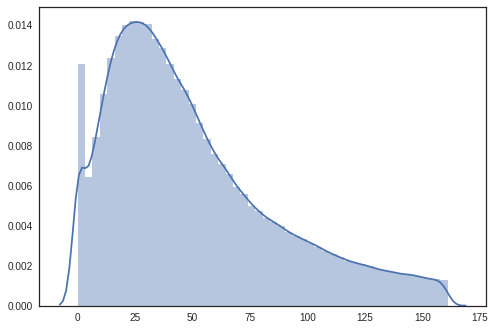

In [99]:
import seaborn as sb


from scipy.stats import sigmaclip

# (data, 
#                          sigma=3, 
#                          sigma_lower=None, 
#                          sigma_upper=None, 
#                          iters=5, 
#                          cenfunc=<function median>, 
#                          stdfunc=<function std>, 
#                          axis=None, 
#                          copy=True)
def plotClippedHist(data,sigma, log=False):
    c, upp, low = sigmaclip(data,sigma ,sigma)
    
    with sb.axes_style("white"):
        if log == True:
            sb.distplot(np.log10(c))
        else:
            sb.distplot(c)
        

plotClippedHist(planck_mw['AME'], 3)

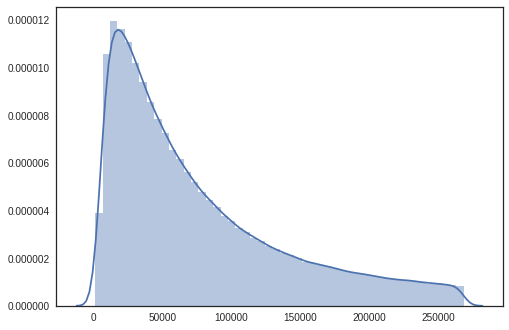

In [93]:
plotClippedHist(AMEcomb_rad, 3)

In [306]:

plotClippedHist(np.log10(AMEfix_rad), 5)

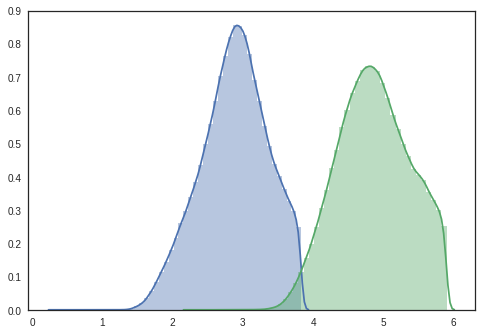

In [101]:
plotClippedHist(AMEfix_rad, 4, log=True)
plotClippedHist(AMEvar_rad, 4, log=True)

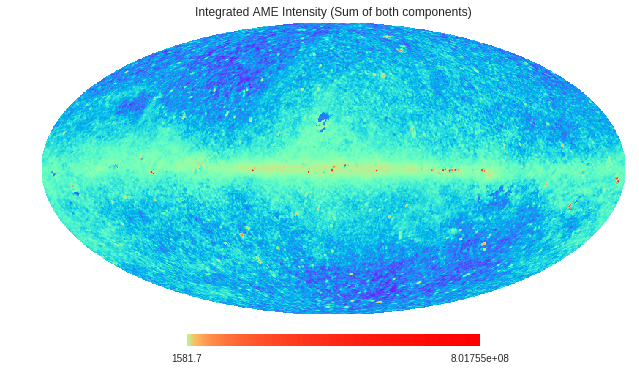

In [216]:

AMEcomb_rad

hp.mollview(AMEcomb_rad, 
            norm='log', 
            nest=True, 
            #min=1.5, max = 2.0, 
            cmap=cmap,
            title = "Integrated AME Intensity (Sum of both components)")

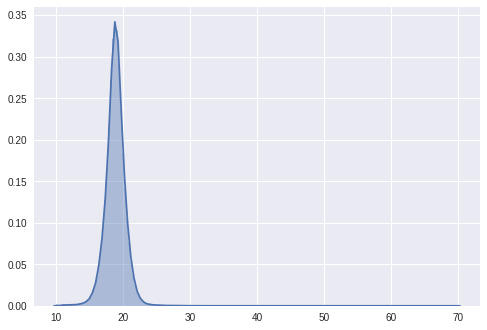

In [290]:
#bins = plt.hist(np.log(AMEvar_rad),  bins=200,density=True, alpha=0.3)
bins = sb.distplot(AMEvar_freq, 
                   bins=200)

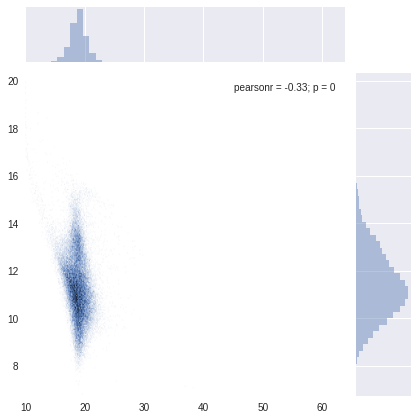

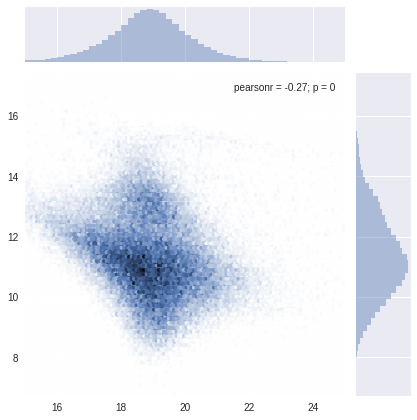

In [303]:
sb.jointplot(AMEvar_freq[::10],
             np.log(AMEvar_rad[::10]), 
             kind= 'hex')

sb.jointplot(AMEvar_freq[::10][(AMEvar_freq[::10]<25) & (AMEvar_freq[::10]>15)],
             np.log(AMEvar_rad[::10][(AMEvar_freq[::10]<25) & (AMEvar_freq[::10]>15)]), 
             kind= 'hex')

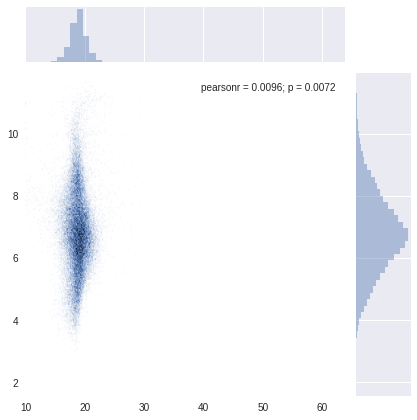

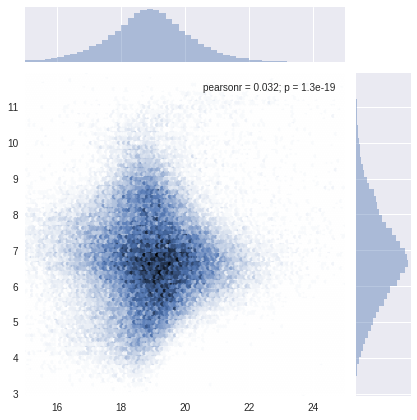

In [304]:
sb.jointplot(AMEvar_freq[::10],
             np.log(AMEfix_rad[::10]), 
             kind= 'hex')

sb.jointplot(AMEvar_freq[::10][(AMEvar_freq[::10]<25) & (AMEvar_freq[::10]>15)],
             np.log(AMEfix_rad[::10][(AMEvar_freq[::10]<25) & (AMEvar_freq[::10]>15)]), 
             kind= 'hex')

In [176]:
freq_cut = np.where(AMEvar_rad[AMEvar_freq > 15]
                    


In [ ]:
Next we 

In [212]:
ancillframe = pd.DataFrame()

    
ancillframe['$N_{H}$'] = hp.ud_grade(
    hp.read_map('/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/lambda_combined_nh.fits',
                                  nest=True),
    nside_out = 256,
    order_in = 'NESTED',
    order_out = 'NESTED',
    pess=True)


ancillframe['$H_{a}$'] = hp.ud_grade(
                               hp.read_map(
                                   '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/lambda_halpha_fwhm06_0512.fits',
                                           nest=True),
                               nside_out = 256, 
                               order_in = 'NESTED', 
                               order_out = 'NESTED' )

ancillframe['H408'] = hp.ud_grade(
                               hp.read_map(
                                   '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/haslam408_dsds_Remazeilles2014.fits',
                                           nest=True),
                               nside_out = 256, 
                               order_in = 'NESTED', 
                               order_out = 'NESTED' )
    
    

    
ancillframe_n64 = pd.DataFrame()

for i in ancillframe.columns:
    ancillframe_n64[i] =  hp.ud_grade(
            
            ancillframe[i].values,
            nside_out = 64,
            order_in = 'NESTED',
            order_out = 'NESTED')

ancillframe_n64['$AME_{wmap}$'] = hp.ud_grade(
                hp.read_map(
                    '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/wmap_mcmc_sd_k_spin_dust_temp_7yr_v4p1.fits',
                nest=True),
            nside_out = 64,
            order_in = 'NESTED',
            order_out = 'NESTED')


NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST
NSIDE = 64
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler


### Setup the standard pipeline to apply to all the data:
allsky_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler(with_mean=False)),
])
# allsky_pipeline = Pipeline([
#     ('imputer', Imputer(strategy="median"))
# ])

phot_tr      = pd.DataFrame(allsky_pipeline.fit_transform(phot),columns=phot.columns)
planck_bb_tr = pd.DataFrame(allsky_pipeline.fit_transform(planck_bb),columns=planck_bb.columns)
planck_mw_tr = pd.DataFrame(allsky_pipeline.fit_transform(planck_mw),columns=planck_mw.columns)




### 1.1) Cross-correlation among all IR photometric bands and AME map
##### Split by Galactic Latitude

In [190]:
glatrange     = 10.0
elatrange     = 10


gcut_l = np.where(
    (abs(coords['glat']) < glatrange) & 
    (abs(coords['elat']) > elatrange)
    )

gcut_h = np.where(
    (abs(coords['glat']) > glatrange) & 
    (abs(coords['elat']) > elatrange)
)



In [191]:
def plotCorrMatrix(mapframe, pdf_suffix):
    
    mapframe_corr     = mapframe.corr(method='spearman')
    mapframe_corr_lgl = mapframe.iloc[gcut_l].corr(method='spearman')
    
    mask = np.zeros_like(mapframe_corr.values)
    mask[np.triu_indices_from(mask,k=1)] = True

    with sb.axes_style("white"):


        fig, ax = plt.subplots(1,2,figsize=(18,9))
        #cbar_ax = fig.add_axes([.91, .2, .03, .7])

        sb.heatmap(
            mapframe_corr,
            #linewidths=.5,
            annot=True,
            mask=mask,
            cbar=False,
            yticklabels=True,
            xticklabels=True,
            ax = ax[0],
            vmin=0,
            vmax=1)

        ax[0].set_title("Whole-sky", fontsize=20)

        sb.heatmap(
            mapframe_corr_lgl,
            #linewidths=.5,
            annot=True,
            mask=mask,
            cbar=False,
            #cbar_ax=cbar_ax,
            yticklabels=True,
            xticklabels=True,
            ax=ax[1],
            vmin=0,
        #    vmax=1 ,cbar_kws={'label': 'Spearman $r$'}
        )

        ax[1].set_title("$|b| < 10^{\circ}$", fontsize=20)

        #cbar_ax.set_title("Spearman $r$")
        fig.tight_layout(rect=[0, 0, .9, 1])

        plt.show()

        fig.savefig("../Plots/all_bands_corr_matrix_wAME_spearman{}.pdf".format(pdf_suffix), bbox_inches='tight')
        fig.savefig("../Plots/png/all_bands_corr_matrix_wAME_spearman{}.png".format(pdf_suffix), bbox_inches='tight')
       


Now we compare the spearman correlation scores among all of the IR bands, and the AME. We do this for for 3 different cases: 

  * Intensity
  * Intensity / U
  * Intensity / R 

In [222]:
# Unnormalized intensity correlations matrix:

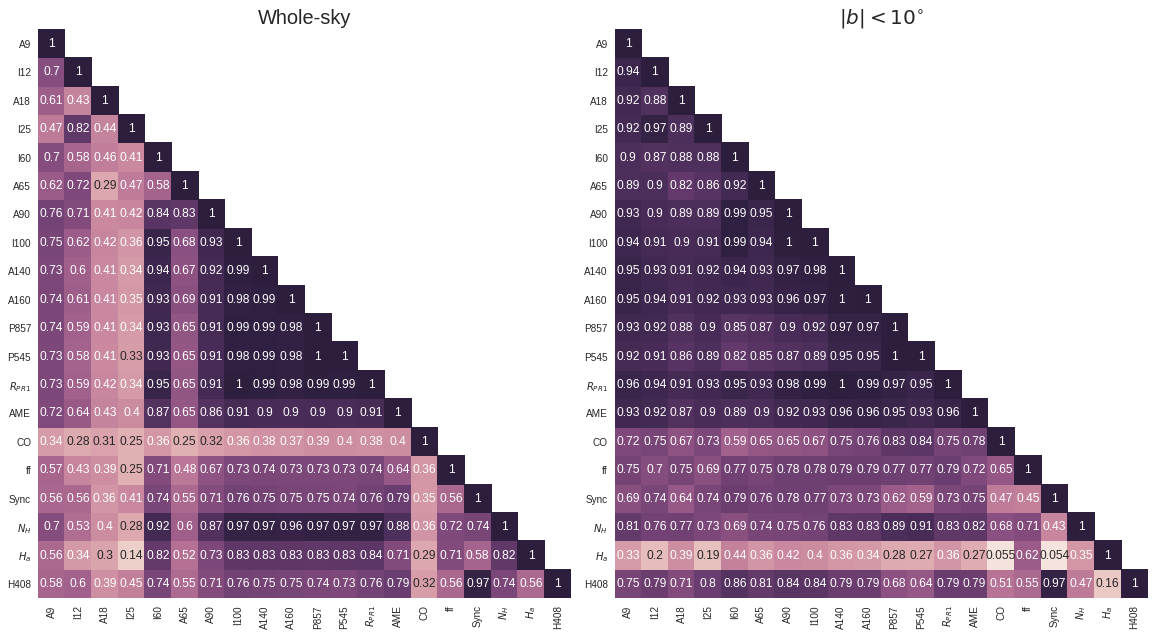

In [223]:
plotCorrMatrix(
    phot_mpsub.join(
        planck_bb['$R_{PR1}$']).join(planck_mw).join(ancillframe),
    pdf_suffix = 'intensity'
               )

### Radiation field normalized correlations matrix:

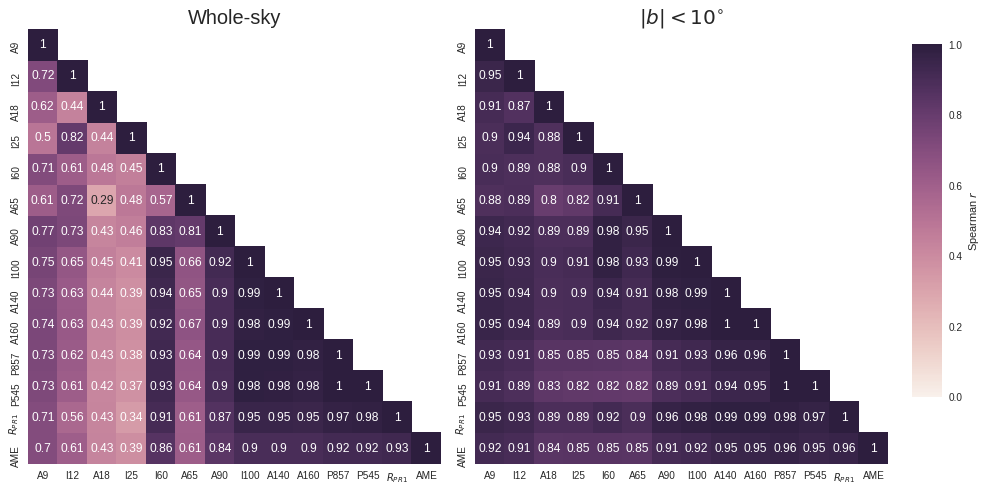

In [194]:
plotCorrMatrix(  
                (
                    phot_mpsub.join(
                    planck_bb['$R_{PR1}$']).join(
                        planck_mw['AME'])
                ).divide(
                    planck_bb['$U$'], axis=0),
                pdf_suffix = 'U_norm'
               )

### Opacity-normalized correlations matrix:

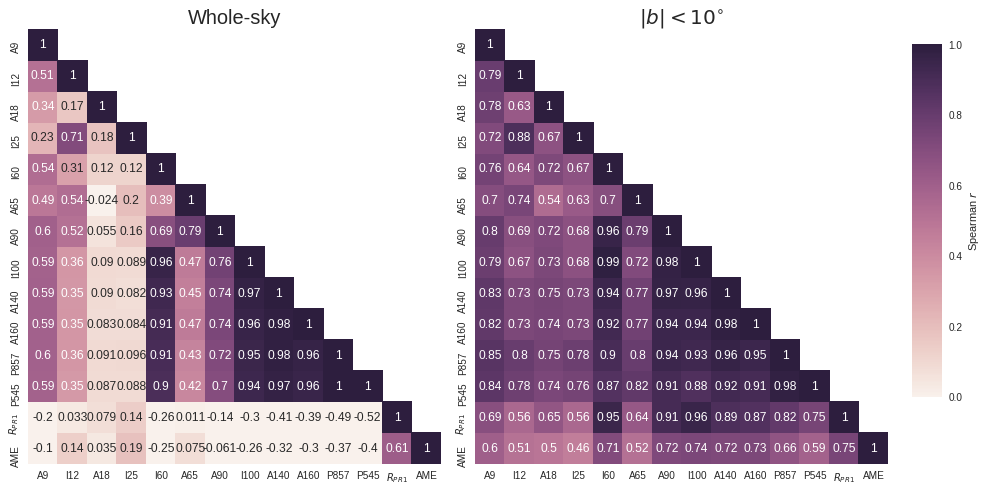

In [10]:
plotCorrMatrix(  
                (
                    phot_mpsub.join(
                    planck_bb['$R_{PR1}$']).join(
                        planck_mw['AME'])
                ).divide(
                    planck_bb['$\tau_{353,PR1}$'], axis=0),
                pdf_suffix = 'tau_norm'
               )

### Radiance noramlized correlations matrix:

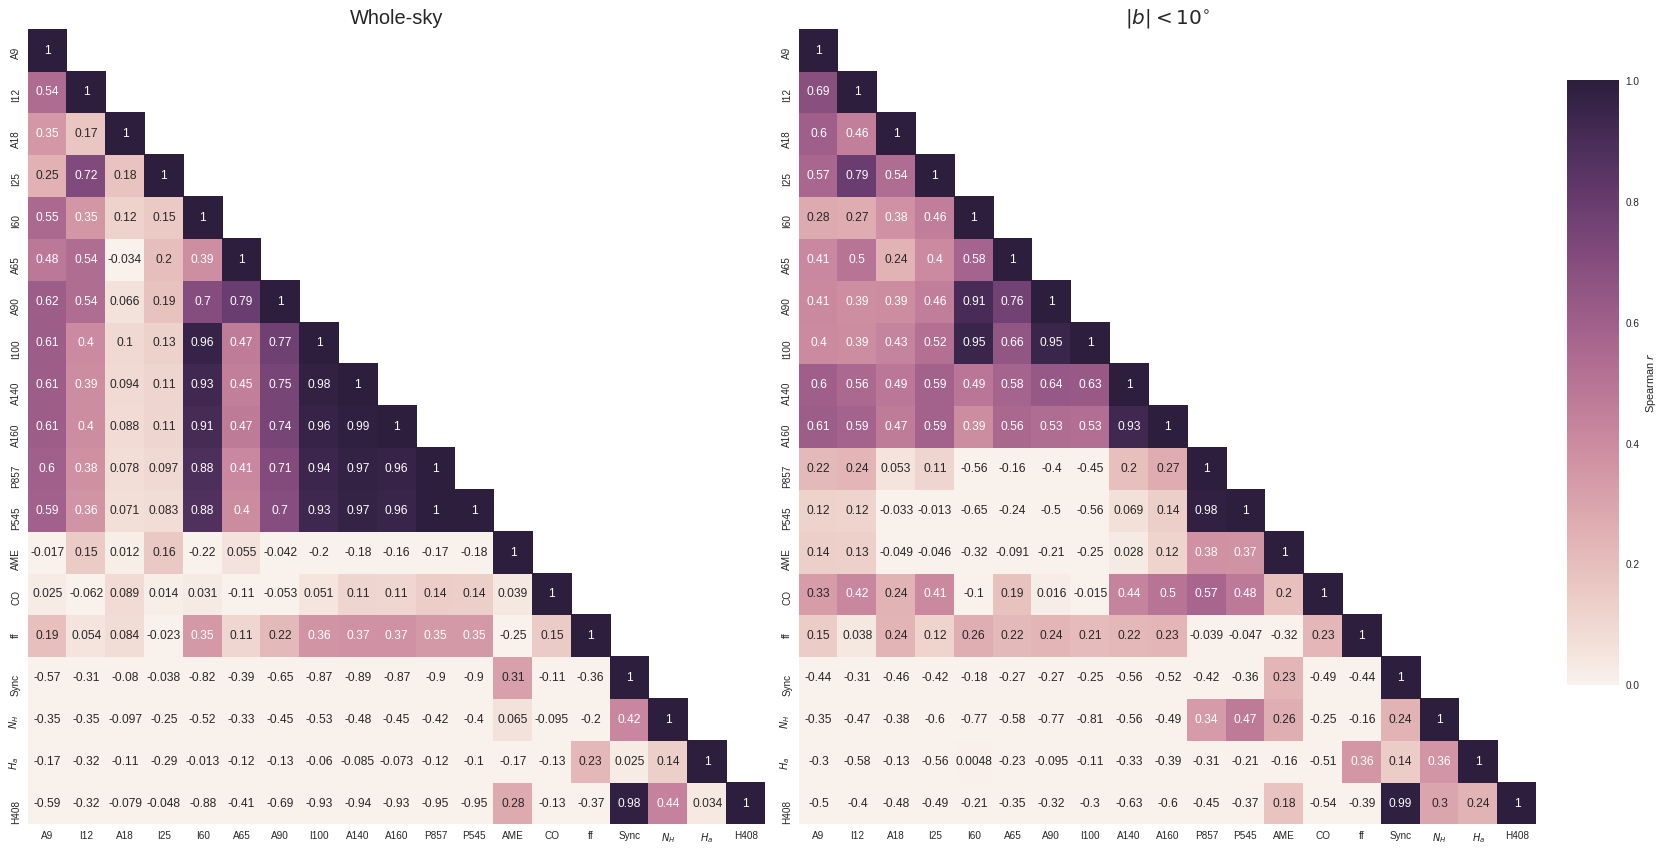

In [214]:
plotCorrMatrix(  
                ((phot_mpsub.join(planck_mw)).join(ancillframe) ).divide(
                    planck_bb['$R_{PR1}$'], 
                    axis=0),
                pdf_suffix = 'R_norm'
               )

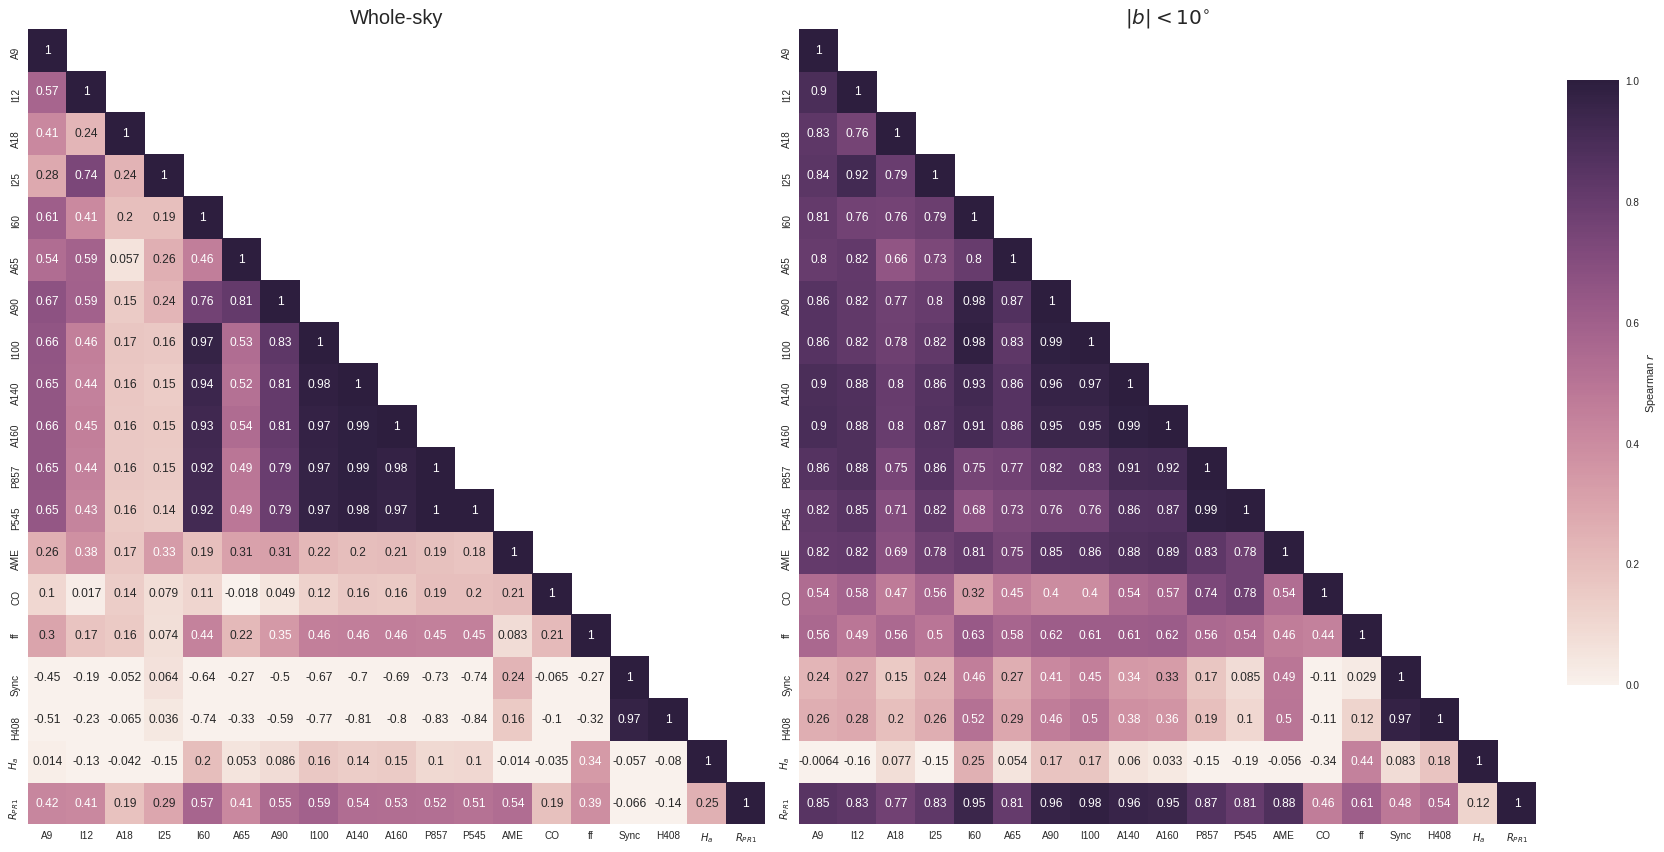

In [216]:
plotCorrMatrix(  
                ((phot_mpsub.join(planck_mw)).join(ancillframe[['H408','$H_{a}$']]).join(planck_bb['$R_{PR1}$']) ).divide(
                    ancillframe['$N_{H}$'], 
                    axis=0),
                pdf_suffix = 'R_norm'
               )

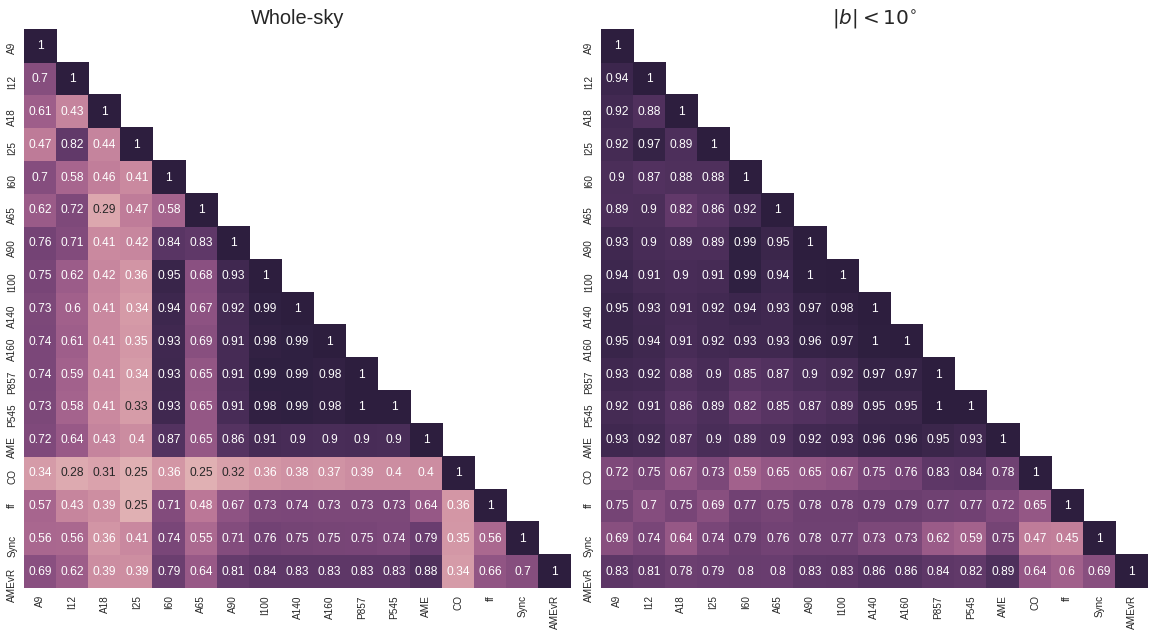

In [217]:
# Use AMEvar radiance as the AME metric:
planck_mw['AMEvR'] = AMEcomb_rad
plotCorrMatrix(  
                  phot_mpsub.join(planck_mw), 
                pdf_suffix = 'AMEvar_rad'
               )

# All-sky AME vs. IR plots:

In [ ]:
def plotBandsCloud(xframe, yseries, xlabel, ylabel, xylims, outpath, nside=256):
    
    sb.set_style("whitegrid")

    ncols=4
    nrows=3
    aspect=1.0

    fig, axs = plt.subplots(ncols=ncols, 
                            nrows=nrows, 
                            sharey=True, 
                            sharex=True)
    #fig.subplots_adjust(hspace=0.1, left=0.1, right=0.7)
    plt.setp(axs.flat, aspect=1.0, adjustable='box-forced')

    k=0

    hsize = hp.nside2npix(nside)
    
    randsub = np.random.randint(low=0, high=hsize, size=hsize//100)


    for i in range(0,nrows):
        for j in range(0,ncols):
                
                #print k
                
                if k > 11:

                    pass

                else:

                    x = xframe[xframe.columns[k]].iloc[randsub]


                    y = yseries.iloc[randsub]

                    x_ = x[(x>0) & (y>0) & (np.isfinite(x)==True) & (np.isfinite(y)==True)].copy()
                    y_ = y[(x>0) & (y>0) & (np.isfinite(x)==True) & (np.isfinite(y)==True)].copy()

                    x_ = np.log10(x_).values
                    y_ = np.log10(y_).values

                    ax = axs[i,j]

                    sb.kdeplot(
                           x_,
                           y_,
                           shade=True,
                           shade_lowest=False,
                           gridsize=100,
                            ax = ax)



                    #ax.axis([xmin, xmax, ymin, ymax])
                    ax.axis(xylims)

                    ax.text(0.2, 0.9,xframe.columns[k], horizontalalignment='center',
                      verticalalignment='center',
                      transform=ax.transAxes, 
                      fontsize=15)

                    ax.grid(True)

                    ax.set_frame_on(True)

                    k += 1
                    
        ax = axs[-1,0]
        ax.set_ylabel(ylabel, fontsize=15)
        ax = axs[-1,0]
        ax.set_xlabel(xlabel, fontsize=15)

        plt.show()

        fig.savefig(outpath, bbox_inches='tight')
        fig.savefig(outpath[:-4]+".png", bbox_inches='tight')

                    
    return axs
    


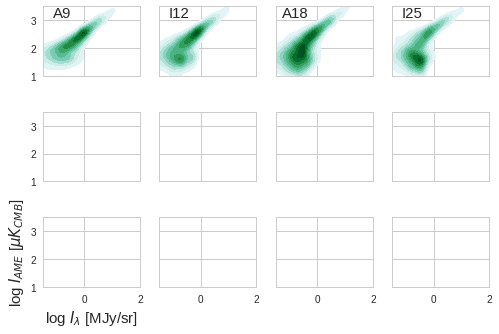

In [373]:
axs = plotBandsCloud(
                xframe = phot_mpsub, 
               yseries = planck_mw['AME'],
                ylabel = 'log $I_{AME}$ [$\mu{}K_{CMB}$]',
                xlabel = 'log $I_{\lambda}$ [MJy/sr]',
                xylims = [-1.5,2,1,3.5],
                outpath = "../Plots/AMEvsDust_allsky_allbands__mpsub_kde.pdf"
)

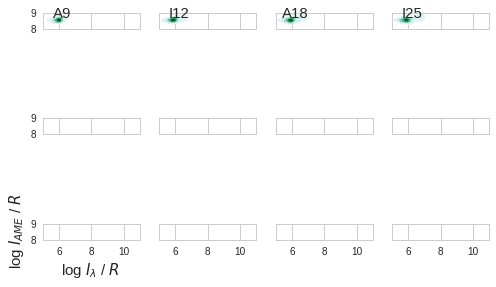

In [374]:
xframe = phot_mpsub.divide(planck_bb['$R_{PR1}$'], axis=0)
yseries = planck_mw['AME'].divide(planck_bb['$R_{PR1}$'], axis=0)
axs = plotBandsCloud(
                xframe = xframe, 
               yseries = yseries,
                ylabel = 'log $I_{AME}$ / $R$',
                xlabel = 'log $I_{\lambda}$ / $R$ ',
                xylims = [5,11,8,9],
                outpath = "../Plots/AMEvsDust_allsky_allbands__mpsub_Rnorm_kde.pdf"
)

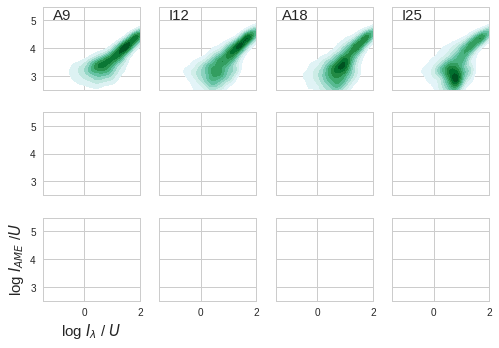

KeyboardInterrupt: 

In [375]:
axs = plotBandsCloud(
                xframe = phot_mpsub.divide(planck_bb['$U$'], axis=0), 
               yseries = planck_mw['AME'].divide(planck_bb['$U$'], axis=0),
                ylabel = 'log $I_{AME}$ /$U$',
                xlabel = 'log $I_{\lambda}$ / $U$',
                xylims = [-1.5,2,2.5,5.5],
                outpath = "../Plots/AMEvsDust_allsky_allbands_mpsub_UNorm_kde.pdf"
)

In [ ]:
axs = plotBandsCloud(
                xframe = phot_mpsub.divide(planck_bb['$\tau_{353,PR1}$'], axis=0), 
               yseries = planck_mw['AME'].divide(planck_bb['$\tau_{353,PR1}$'], axis=0),
                ylabel = 'log $I_{AME}$ / $\tau{}_{353}$',
                xlabel = 'log $I_{\lambda}$ / $\tau{}_{353}$',
                xylims = [3,5,6.5,7.5],
                outpath = "../Plots/AMEvsDust_allsky_allbands__mpsub__tauNorm_kde.pdf"
)

# Check spatial correlations:

In [308]:
def testSpatialCorr(df, 
                    nside_in, 
                    nside_out,
                    method='spearman'):
    
    npix_in    = 12*nside_in**2
    npix_out   = 12*nside_out**2
    pix_interv = (nside_in/nside_out)**2
    
    ## First, do it the "normal way"-
    patches_corr = [df.iloc[i*pix_interv:(i+1)*pix_interv].corr(method=method) for i in range(0,npix_out)]
    corr_patches_pn = pd.Panel({i: patches_corr[i] for i in range(0,npix_out)})

    
    return corr_patches_pn

def displaySpatialCorr(corr_patches_pn,labels, ref_col=0,savefig=True,subdir='../Plots/Allsky_Corr/'):

    nside = len(corr_patches_pn.values[:,0,0])
    #fig = plt.figure(figsize=(8,4))

    for j in range(0,len(labels)):
        #plt.subplot(2,5,(j*2)+1)
        hp.mollview(corr_patches_pn.values[:,j,ref_col],
                         #sub=(1,4,j+1), 
                         #fig=fig,
                         cmap = cmap, 
                         cbar = False, 
                         min  = -1, 
                         max  = 1, 
                         nest = True, 
                         title="$S$({}:{}) NSIDE".format(labels[ref_col],labels[j],nside_out))
        hp.graticule(dpar=5, dmer=5,coord='G')
        if savefig==True:
            plt.savefig("{}/Spearman_Map_nside{}_{}to{}.pdf".format(subdir,nside_out,labels[ref_col],labels[j]) )

### Calculate all intensity correlations

In [315]:
%%capture
nside_in = 256
nside_out = 8
test_frame = phot_mpsub.join(planck_mw)
# Makes all the correlation maps

corr_patches_pn = testSpatialCorr(test_frame,
                                  nside_in, 
                                  nside_out)

for i in range(0,len(test_frame.columns)):
    displaySpatialCorr(corr_patches_pn, test_frame.columns, ref_col = i)

#### Get I12-normalized correlations

In [312]:
nside_in = 256
nside_out = 8
test_frame_I12norm = phot_mpsub.drop(['I12'],axis=1).join(planck_mw).divide(phot_mpsub['I12'], axis=0)
corr_patches_pn_I12norm = testSpatialCorr(test_frame_I12norm,
                                  nside_in, 
                                  nside_out)

##### Display just the A9:all correlations

In [313]:
%%capture
displaySpatialCorr(corr_patches_pn_I12norm, 
                   test_frame_I12norm.columns, 
                   ref_col = 0,
                   subdir='../Plots/Allsky_Corr/I12Norm',
                   savefig=False)

### Get the R-normalized correlations

In [ ]:
planck_mw.f

In [316]:
%%capture
nside_in = 256
nside_out = 8
test_frame_Rnorm = phot_mpsub.join(
    planck_mw['AME']).divide(
        planck_bb['$R_{PR1}$'], axis=0).join(planck_mw[['Sync','ff']])

corr_patches_pn_Rnorm = testSpatialCorr(test_frame_Rnorm,
                                  nside_in, 
                                  nside_out)

In [ ]:
#### Display just the A9:all correlations

In [180]:
test_frame_Rnorm.columns

Index([u'A9', u'I12', u'A18', u'I25', u'I60', u'A65', u'A90', u'I100', u'A140',
       u'A160', u'P857', u'P545', u'AME', u'Sync', u'ff'],
      dtype='object')

In [319]:
%%capture
displaySpatialCorr(corr_patches_pn_Rnorm, 
                   test_frame_Rnorm.columns, 
                   ref_col = -3,
                   subdir='../Plots/Allsky_Corr/RadNorm',
                   savefig=True)

In [ ]:
from scipy.stats import zscore


def sigmaClip(df, zs = 3):

     df.values[zscore(df.values, axis=0) > zs] = np.nan
    
     return df

def displayRatioMap(df1,df2, nest = True, cmap = "rainbow"):
    
    ratio = df1 / df2
    
    hp.mollview(sigmaClip(ratio), 
                nest = nest, 
                norm = 'log', 
                cmap =cmap, 
                notext= True,
                min=0.2, 
                max = 10,
                title = '',
                xsize = 1000)
    plt.show()
        
    sb.distplot(sigmaClip(ratio, zs = 5).dropna())
        
phot_mpsub_sclip = phot_mpsub.copy()
phot_mpsub_sclip = sigmaClip(phot_mpsub_sclip)
    

displayRatioMap(phot_mpsub['A9'] ,
                phot_mpsub['I12'],
               cmap = cmap)
    


# 9 to 12 micron ratio map:

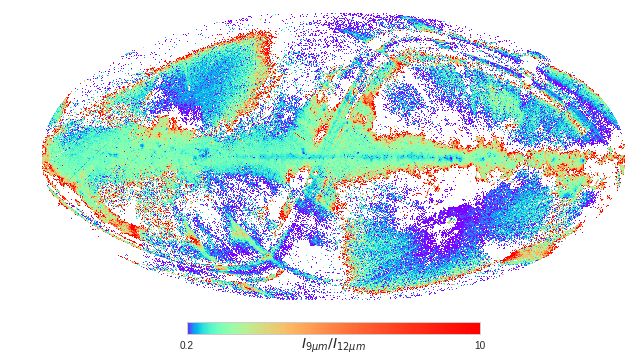

In [391]:
hp.mollview( phot_mpsub['A9'] / phot_mpsub['I25'], 
            min=0.2, 
            max = 10, 
            nest= True, 
            norm = 'log',
            cmap=cmap,
            title = '',
            xsize = 1000,
            unit = '$I_{9\mu{}m} / I_{12\mu{}m}$')
plt.savefig('../Plots/ch_datasources/ratioMap_A9I12.pdf')

# 9 to 25 micron ratio map:

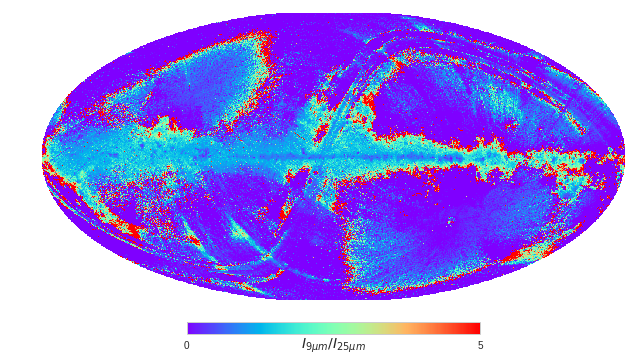

In [401]:
hp.mollview( phot_mpsub['A9'] / phot_mpsub['I25'], 
            min=0, 
            max = 5, 
            nest= True, 
            #norm = 'symlog',
            cmap=cmap,
            title = '',
            xsize = 1000,
            unit='$I_{9\mu{}m} / I_{25\mu{}m}$')
plt.savefig('../Plots/ch_datasources/ratioMap_A9I25.pdf')

In [363]:
phot_mpsub_sclip

A9        I12         A18         I25         I60         A65  \
0       32.576195  37.152733  161.111088  142.050811  739.663890  839.000925   
1       16.211823  14.886462   15.641566   27.124137  122.780444   96.356317   
2       15.660368  12.771348   13.058396   20.603543   90.007212   89.990480   
3       12.852653   9.948460   11.180863   16.977584   69.936061   74.502397   
4       13.925347  10.900413   11.847739   17.895793   86.984736   91.578523   
5       12.233478   9.088176   10.055906   14.219354   67.880900   78.288316   
6       11.164545   8.584570    9.933668   14.511838   61.460337   69.873537   
7        9.583255   7.678058    8.687536   12.369298   53.321086   64.715745   
8       15.916954  13.312329   13.602772   21.408131  100.752566  103.462144   
9       12.710104  10.351114   10.794411   16.890862   81.380839   85.722063   
10      15.087374  13.183052   13.453015   21.549155  114.149516  114.336702   
11      17.061728  10.298443   11.593199   15.447083   76.233287   78.787576   
12      11.072125   8.480130    9.411591   13.523988   64.829211   71.880815   
13       8.780507   7.238336    7.866260   10.903197   52.179759   62.198488   
14      10.216999   8.672846    8.931730   12.877962   61.418067   67.687212   
15       8.192556   6.517585    7.325485    9.661135   49.147875   58.639402   
16      10.128691   7.370162    8.559498   11.390770   48.927111   62.956583   
17       8.334516   6.419036    7.383627    9.218707   35.213389   56.654199   
18      15.140721   7.136568   12.946036   10.390235   40.837966   56.677431   
19       6.882645   4.870143    6.160512    7.117514   30.071877   51.605833   
20       6.818663   4.980671    6.043700    6.730375   26.492224   49.163591   
21       5.438127   4.065467    5.311688    5.349167   25.015624   48.457090   
22       5.726775   4.259378    5.287550    5.612865   26.248912   46.441324   
23       5.259449   3.724734    4.901476    4.562364   24.314726   44.266634   
24       7.434859   6.184887    6.382170    8.322326   37.338912   53.568052   
25       6.488611   5.314420    5.561902    6.718011   28.142537   48.081308   
26       7.292727   5.671075    6.737178    7.384247   36.803347   50.366548   
27       6.334367   4.971280    6.278911    6.160191   25.657025   43.458570   
28       4.659410   3.788689    4.350500    4.798507   23.587969   41.797487   
29       5.326240   3.785360    5.201480    4.448330   23.840325   40.949007   
...           ...        ...         ...         ...         ...         ...   
786402  10.532738   7.189838    7.927242    8.399003   50.949175   61.141920   
786403  12.660043   9.551279    9.782998   10.790378   58.225527   67.128191   
786404   8.823171   6.761182    7.381157    7.704206   44.351187   55.567964   
786405   8.562760   5.676119    7.334237    7.282691   40.597056   51.098634   
786406  11.513485   8.303628    9.369431   10.195855   57.370741   67.328813   
786407   9.884442   7.036719    8.357969    9.368213   46.875529   60.121530   
786408  12.030430   8.898823    9.418192   11.239922   67.528514   74.294565   
786409  14.543089  10.664926   11.485400   13.282689   73.052714   80.432870   
786410  32.493927  15.190768   27.798058   17.509307   88.138651  102.688997   
786411  14.921191  11.164022   11.887368   14.847056   76.326563   93.840288   
786412  15.420302   9.402933   11.845879   12.326999   65.303279   72.510118   
786413  13.857821   8.988631   11.082698   12.269753   60.328818   71.435876   
786414  13.534650   9.443476   10.903311   14.145290   66.602297   82.228799   
786415  17.697052  13.462586   14.985102   18.938651   85.161753  104.269990   
786416   8.682422   6.328299    7.615247    8.174306   40.971545   51.842611   
786417  12.042654   9.451973   10.266309   11.425503   52.952304   66.030618   
786418  10.671934   7.623321    8.716227   10.157947   44.431056   58.531999   
786419  15.342749   9.413706   11.584494   12.644816   57.150672   70.691698   
786420  16.4790

In [325]:
pd.DataFrame(zscore(phot_modesub.replace(to_replace=np.nan, value=hp.UNSEEN, axis=0)), columns=phot.columns).describe()

A9           I12           A18           I25           I60  \
count  7.864320e+05  7.864320e+05  7.864320e+05  7.864320e+05  7.864320e+05   
mean  -1.106347e-13  2.548033e-16 -1.106347e-13 -2.416006e-16  1.313833e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.883750e+01 -3.089935e-01 -1.883750e+01 -1.980559e-01 -1.050080e-01   
25%    5.308559e-02 -1.450608e-01  5.308559e-02 -6.464853e-02 -7.769668e-02   
50%    5.308559e-02 -1.009900e-01  5.308559e-02 -4.464437e-02 -7.119701e-02   
75%    5.308559e-02 -4.143122e-02  5.308559e-02 -2.405516e-02 -5.144976e-02   
max    5.308559e-02  2.599272e+02  5.308559e-02  3.728086e+02  2.320100e+02   

                A65           A90          I100          A140          A160  \
count  7.864320e+05  7.864320e+05  7.864320e+05  7.864320e+05  7.864320e+05   
mean   4.580667e-14  4.258941e-14  9.327504e-16 -3.364212e-14  3.495937e-15   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -7.631790e+01 -7.899699e+01 -1.493428e-01 -1.457872e+02 -1.352336e+02   
25%    1.310309e-02  1.265871e-02 -1.328474e-01  6.859311e-03  7.394614e-03   
50%    1.310309e-02  1.265871e-02 -1.167846e-01  6.859311e-03  7.394614e-03   
75%    1.310309e-02  1.265871e-02 -6.799565e-02  6.859311e-03  7.394614e-03   
max    1.310309e-02  1.265871e-02  1.338912e+02  6.859311e-03  7.394614e-03   

               P857          P545  
count  7.864320e+05  7.864320e+05  
mean   9.045544e-16 -1.005649e-15  
std    1.000001e+00  1.000001e+00  
min   -2.488448e-01 -2.808664e-01  
25%   -2.234617e-01 -2.495869e-01  
50%   -1.907863e-01 -2.122845e-01  
75%   -8.368784e-02 -8.735129e-02  
max    1.348582e+02  1.236430e+02

In [321]:

phot_modesub_zscore = pd.DataFrame(
    zscore(phot_modesub.replace(
        to_replace=np.nan, 
        value=hp.UNSEEN, 
        axis=0)), 
    columns=phot.columns)


phot_modesub_sclip[(abs(phot_modesub_zscore) > 5) & (phot_modesub_sclip < 0) ] = np.nan

NameError: name 'zscore' is not defined

In [206]:
hp.mollview(phot_modesub_sclip.A9 / phot_modesub_sclip.I12, min =0.01 , max = 1000, 
            nest=True, norm = 'log', cmap=cmap)

NameError: name 'phot_modesub_sclip' is not defined

In [320]:
hp.mollview(phot_modesub_sclip.A9 / planck_bb['$R_{PR1}$'],  
            nest=True, norm = 'hist', min=0, cmap=cmap)

NameError: name 'phot_modesub_sclip' is not defined

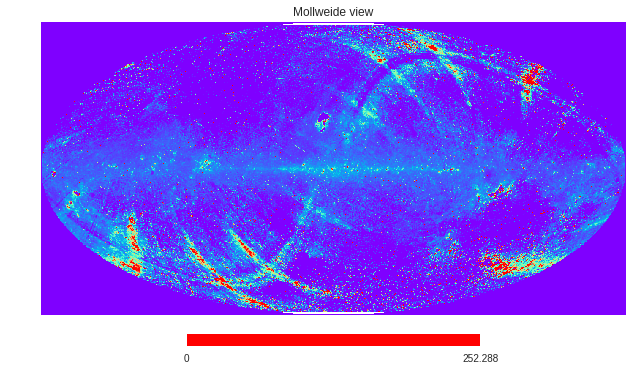

In [166]:
hp.mollview(phot_modesub_sclip.A9 / planck_mw['AME'],  
            nest=True, norm = 'hist', cmap=cmap, min=0)

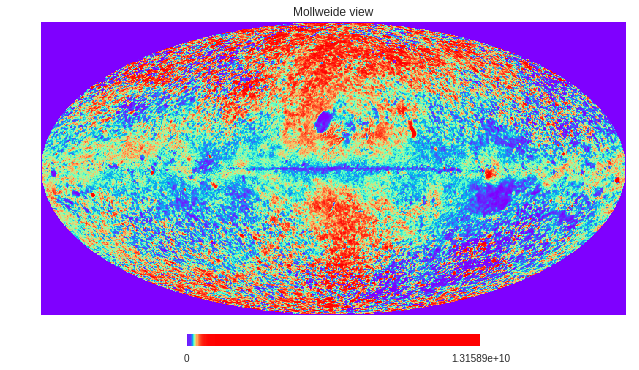

In [168]:
hp.mollview(planck_mw['AME'] / planck_bb['$R_{PR1}$'],  
            nest=True, norm = 'hist', cmap=cmap, min=0)

In [114]:
hp.mollview(phot_mpsub['A9'])

AttributeError: 'MaskedConstant' object has no attribute '_fill_value'

AttributeError: 'MaskedConstant' object has no attribute '_fill_value'

In [ ]:
hp.mollview( phot_mpsub['A9'].values[phot_mpsub['A9'].values>=0] / phot_mpsub['I25'].values[phot_mpsub['A9'].values>=0], nest= True, norm = 'hist')

In [ ]:
sb.joinplot(planck_mw['AME']/hframe['4.57e5'],
           phot_mpsub)

In [21]:
hframe['N(H1)'] = hp.ud_grade(
    hp.read_map('/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/lambda_combined_nh.fits',
                                  nest=True),
    nside_out = 256,
    order_in = 'NESTED',
    order_out = 'NESTED',
    pess=True)

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


In [ ]:
hp.mollview( planck_mw['AME']/radioframe['4.57e5'], nest= True, norm = 'hist'
)

In [ ]:
sb.jointplot

In [ ]:
nside_in = 256
nside_out = 8
test_frame_RadNorm = phot_mpsub.join(planck_mw['AME']).divide(planck_bb['$R_{PR1}$'], axis=0)
corr_patches_pn_RadNorm = testSpatialCorr(test_frame_RadNorm,
                                  nside_in, 
                                  nside_out)

In [ ]:
for i in range(0,len(test_frame_RadNorm.columns)):
    displaySpatialCorr(corr_patches_pn_RadNorm, test_frame_RadNorm.columns, ref_col = i,
                                  subdir='../Plots/Allsky_Corr/UNorm')

In [ ]:
nside_in = 256
nside_out = 8
test_frame_UNorm = phot_mpsub.join(planck_mw['AME']).divide(planck_bb['$U$'], axis=0),
corr_patches_pn_UNorm = testSpatialCorr(test_frame_UNorm,
                                  nside_in, 
                                  nside_out)

In [ ]:
for i in range(0,len(test_frame_UNorm.columns)):
    displaySpatialCorr(corr_patches_pn_UNorm, test_frame_UNorm.columns, ref_col = i,
                                  subdir='../Plots/Allsky_Corr/UNorm')

In [7]:
# All-sky Ionization fraction:
phot_mir_ratios = phot_mpsub.drop(['A9']).join(planck_bb['$R_{PR1}$']).join(planck_mw['$R_{PR1}$']).divide(phot_mpsub.A9)
   

NameError: name 'phot_mpsub' is not defined

In [ ]:
# The check appears successful, so make a plot grid of all the nsides:

## All-sky Noise Estimation:

In [ ]:
hmap_hists =  pd.DataFrame.hist(phot_modesub, 
                                range=(-10, 25), 
                                bins=100, 
                                alpha=0.4, 
                                grid=True,
                                sharex=True, 
                                xlabelsize=15,
                                sharey=False,
                                ylabelsize=12,
                                figsize=(11,8.5),
                                **{'normed':True})
hmap_hists

In [ ]:
def plot_hdists(df):
    
    import seaborn as sns
    import scipy.stats as stats
    sns.distplot(df, bins=1000, kde=False, fit=stats.gamma )
    print 
    
plot_hdists(phot_modesub[(phot_modesub>-5) & (phot_modesub<25)].A9.dropna())

In [ ]:
data = phot_modesub.dropna().values[:,0]
# phot_modesub[(phot_modesub>-5) & (phot_modesub<25)].A9.dropna()
# data.std()


In [ ]:
from astropy.modeling import models, fitting

def fitAndPlot(data, ymax=2.0, nbins=1000, amplitude =1, stddev = 1, mean=0, zero_mean=False, left_wing=False, left_mean=False, xrange=(-10,10)):
    

    # Get distribution
    y,x, patches = plt.hist(data, range=xrange, bins=nbins, normed=True,alpha=0.8)
    #print y
    # Fit the data using a Gaussian
    g_init = models.Gaussian1D(amplitude=amplitude, mean=mean, stddev=stddev)
    g_init.mean.fixed = zero_mean
    g_init.stddev.bounds = (0,None)
    fit_g = fitting.LevMarLSQFitter()
    
    if left_wing == True:
        g = fit_g(g_init, x[:-1][x[:-1]<0], y[x[:-1]<0])
    elif left_mean == True:
        g = fit_g(g_init, x[:-1][x[:-1]<np.mean(data)], y[x[:-1]<np.mean(data)])
    else:
        g = fit_g(g_init, x[:-1], y)



    plt.plot(x,g(x),label='Gaussian', color='black',alpha=0.8)



    # Plot the data with the best-fit model
    # plt.figure(figsize=(8,5))
    # plt.plot(x, y[:-1], 'ko')
    # plt.plot(x, g(x), label='Gaussian')
    plt.ylim(0,ymax)
    plt.ylabel('Norm. Pixel Count', fontsize=22)
    plt.xlabel('Intensity [MJy/sr]',fontsize=22)
    plt.legend(loc=2)
    plt.text((xrange[1]-abs(xrange[0])*3)/8,ymax/4,"Stddev: "+str(round(g.stddev.value,3)),fontsize=22)
    plt.text((xrange[1]-abs(xrange[0])*3)/8,(ymax*5)/8,"Data mean: "+str(round(np.mean(data),3)),fontsize=22)
    
    return g.stddev.value

# fitAndPlot(data)
# plt.show()
# plt.close()
# fitAndPlot(data, zero_mean=True)
# plt.show()
# plt.close()
# fitAndPlot(data, zero_mean=False, left_wing=True)
# plt.show()
# plt.close()
fitAndPlot(data, left_mean=True)
plt.show()
plt.close()
    
# Select data

In [ ]:
# Get distribution
y,x, patches = plt.hist(planck_mw.AME.dropna().values-0, range =(-30,150),bins=1000, normed=True,alpha=0.8)
#print y
# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=0.1, mean=0, stddev=1.)
g_init.mean.fixed = False
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x[:-1][x[:-1]<0], y[x[:-1]<0])

plt.plot(x,g(x),label='Gaussian', color='black')

plt.ylabel('Norm. Pixel Count', fontsize=22)
plt.xlabel('Intensity [uKCMB]',fontsize=22)
plt.legend(loc=2)


print np.size(planck_mw.AME.dropna()==0)

In [ ]:
# Get distribution
y,x, patches = plt.hist(planck_bb['$T$'].dropna().values, range =(0,50),bins=100, normed=True,alpha=0.8)
#print y
# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=0.1, mean=20, stddev=1.)
g_init.mean.fixed = False
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x[:-1], y)

plt.plot(x,g(x),label='Gaussian', color='black')



# Plot the data with the best-fit model
# plt.figure(figsize=(8,5))
# plt.plot(x, y[:-1], 'ko')
# plt.plot(x, g(x), label='Gaussian')
#plt.ylim(0,2.0)
plt.ylabel('Norm. Pixel Count', fontsize=22)
plt.xlabel('Intensity [uKCMB]',fontsize=22)
plt.legend(loc=2)
#plt.text(60,0.008,"Stddev: "+str(round(g.stddev.value,3)),fontsize=22)
#plt.text(60,0.006,"Data mean: "+str(round(np.mean(data),3)),fontsize=22)

#print np.size(planck_mw.T.dropna()==0)

In [ ]:
## Whole sky without mean-fixing or wing-selection

In [ ]:
stddevs = []
for i in range(0,len(phot_modesub.columns)):
    data = phot_modesub.dropna().values[:,i]
    stddev = fitAndPlot(data)
    stddevs.append(stddev)
    plt.title(phot_modesub.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot_modesub.columns[i]+".pdf", bbox_inches='tight', dpi=100)
    plt.show()
 

In [ ]:
## Whole sky with mean fixed to zero, using only the left wing

In [ ]:
stddevs = []

for i in range(0,len(phot_modesub.columns)):
    data = phot_modesub.dropna().values[:,i]
    stddev = fitAndPlot(data, zero_mean=True, left_wing=True)
    stddevs.append(stddev)
    plt.title(phot_modesub.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot_modesub.columns[i]+"_leftWing_zeroMean.pdf", bbox_inches='tight', dpi=100)
    plt.show()
    plt.close()
 

## Noise estimated for limited patches:

#### Patch 1: (l:130, b:60) [25x25 degree Gal] , npix = 20164

In [ ]:
stddevs = []

noise_patches = [(coords.glon > 117.5) & (coords.glon < 142.5) & (coords.glat > 47.5) & (coords.glat < 72.5),
                 (coords.glon > 217.5) & (coords.glon < 242.5) & (coords.glat < -47.5) & (coords.glat > -72.5),
                 (coords.glon > 217.5) & (coords.glon < 242.5) & (coords.glat > 47.5) & (coords.glat < 72.5)]

for i in range(0,len(phot_modesub.columns)):
    data = phot_modesub[noise_patches[0]].dropna().values[:,i]
    # Using an initial stddev of 1 seems to lead to underfitting, here- using 0,5 instead
    stddev = fitAndPlot(data,
                        amplitude=2, 
                        mean=np.mean(data), 
                        ymax=7, 
                        stddev = 0.1, 
                        zero_mean=False, 
                        left_wing=False,
                        left_mean=False,                        
                        nbins=400, 
                        xrange=(-4,4))
    
    
    stddevs.append(stddev)
    plt.title(phot_modesub.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot_modesub.columns[i]+"_noisePatch1.pdf", bbox_inches='tight', dpi=100)
    plt.show()
    plt.close()
 

#### Patch 2: (l:230, b:-60) [25x25 degree Gal] , npix = 20164

In [ ]:
for i in range(0,len(phot_modesub.columns)):
    data = phot_modesub[noise_patches[1]].dropna().values[:,i]
    # Using an initial stddev of 1 seems to lead to underfitting, here- using 0,5 instead
    stddev = fitAndPlot(data,
                        amplitude=2, 
                        mean=np.mean(data), 
                        ymax=7, 
                        stddev = 0.1, 
                        zero_mean=False, 
                        left_wing=False, 
                        nbins=1000, 
                        xrange=(data.min(),data.max()))
    
    stddevs.append(stddev)
    plt.title(phot_modesub.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot_modesub.columns[i]+"_leftWing_zeroMean_noisePatch2.pdf", bbox_inches='tight', dpi=100)
    plt.show()
    plt.close()

#### Patch 3: (l:230, b:60) [25x25 degree Gal] , npix = 20164

In [ ]:
for i in range(0,len(phot_modesub.columns)):
    data = phot_modesub[noise_patches[2]].dropna().values[:,i]
    # Using an initial stddev of 1 seems to lead to underfitting, here- using 0,5 instead
    stddev = fitAndPlot(data,
                        amplitude=2, 
                        mean=np.mean(data), 
                        ymax=7, 
                        stddev = 0.1, 
                        zero_mean=False, 
                        left_wing=False, 
                        nbins=1000, 
                        xrange=(data.min(),data.max()))
    
    stddevs.append(stddev)
    plt.title(phot_modesub.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot_modesub.columns[i]+"_leftWing_zeroMean_noisePatch3.pdf", bbox_inches='tight', dpi=100)
    plt.show()
    plt.close()

In [ ]:
#### All 3 patches merged together:

noise_patches_merged = ((coords.glon > 117.5) & (coords.glon < 142.5) & (coords.glat > 47.5) & (coords.glat < 72.5)) | \
                 ((coords.glon > 217.5) & (coords.glon < 242.5) & (coords.glat < -47.5) & (coords.glat > -72.5)) | \
                 ((coords.glon > 217.5) & (coords.glon < 242.5) & (coords.glat > 47.5) & (coords.glat < 72.5) )


for i in range(0,len(phot_modesub.columns)):
    data = phot_modesub[noise_patches_merged].dropna().values[:,i]
    # Using an initial stddev of 1 seems to lead to underfitting, here- using 0,5 instead
    stddev = fitAndPlot(np.random.choice(data, size=len(noise_patches_merged)//1),
                        amplitude=2, 
                        mean=np.mean(data), 
                        ymax=7, 
                        stddev = 0.1, 
                        zero_mean=False, 
                        left_mean=False,                        
                        nbins=1000, 
                        xrange=(data.min(),5))
    
    stddevs.append(stddev)
    plt.title(phot_modesub.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot_modesub.columns[i]+"_leftWing_zeroMean_noisePatchMerged.pdf", bbox_inches='tight', dpi=100)
    plt.show()
    plt.close()

## Estimate noise for a limited part of the sky: Planck CMB Mask

#### Masking test

In [ ]:
data =  phot_modesub.A9.values.copy
hp.mollview(data)
print len(data[np.isnan(data)==True])
hmask = hp.read_map('/work1/users/aaronb/Codebrary/Python/Projects/LOrionis/data/raw/healpix/referenceMaps/COM_Mask_CMB-IQU-common-field-MaskInt_0256.fits')
data[hmask==hp.UNSEEN] = np.nan
print len(data[np.isnan(data)==True])
print len(hmask[hmask==hp.UNSEEN])

In [ ]:
from astropy.modeling import models, fitting

def fitAndPlotMaskedTest(data,zero_mean=False, left_wing=False, left_mean=False):
    
    hp.mollview(data.values)
    plt.show()
    plt.close()
    
    data_unmask = data.copy()
    data_mask   = data.copy()
    
    data_unmask = data_unmask.dropna().values

    # Get distribution

    y,x, patches = plt.hist(data_unmask, range=(-10, 10), bins=1000, normed=True,alpha=0.8)
    #print y
    # Fit the data using a Gaussian
    g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
    g_init.mean.fixed = zero_mean
    fit_g = fitting.LevMarLSQFitter()
    
    if left_wing == True:
        g = fit_g(g_init, x[:-1][x[:-1]<0], y[x[:-1]<0])
    elif left_mean == True:
        g = fit_g(g_init, x[:-1][x[:-1]<np.median(data_unmask)], y[x[:-1]<np.median(data_unmask)])
    else:
        g = fit_g(g_init, x[:-1], y)



    plt.plot(x,g(x),label='Gaussian', color='black')



    # Plot the data with the best-fit model
    # plt.figure(figsize=(8,5))
    # plt.plot(x, y[:-1], 'ko')
    # plt.plot(x, g(x), label='Gaussian')
    plt.ylim(0,2.0)
    plt.ylabel('Norm. Pixel Count', fontsize=22)
    plt.xlabel('Intensity [MJy/sr]',fontsize=22)
    plt.legend(loc=2)
    plt.text(0.75,0.5,"Stddev: "+str(round(g.stddev.value,5)),fontsize=22)
    plt.text(0.75,0.75,"Data mean: "+str(round(np.mean(data_unmask),5)),fontsize=22)
    plt.show()
    plt.close()
    
    # Mask pixels from the degraded Planck Foreground Mask Map:
    hmask = hp.read_map('/work1/users/aaronb/Codebrary/Python/Projects/LOrionis/data/raw/healpix/referenceMaps/COM_Mask_CMB-IQU-common-field-MaskInt_0256.fits')


    data_mask[hmask==hp.UNSEEN] = np.nan
    hp.mollview(data_mask)
    plt.show()
    plt.close()
    
    y,x, patches = plt.hist(data_mask, range=(-10, 10), bins=1000, normed=True,alpha=0.8)
    #print y
    # Fit the data using a Gaussian
    g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
    g_init.mean.fixed = zero_mean
    fit_g = fitting.LevMarLSQFitter()
    
    if left_wing == True:
        g = fit_g(g_init, x[:-1][x[:-1]<0], y[x[:-1]<0])
    elif left_mean == True:
        g = fit_g(g_init, x[:-1][x[:-1]<np.median(data_mask)], y[x[:-1]<np.median(data_mask)])
    else:
        g = fit_g(g_init, x[:-1], y)



    plt.plot(x,g(x),label='Gaussian', color='black')



    # Plot the data with the best-fit model
    # plt.figure(figsize=(8,5))
    # plt.plot(x, y[:-1], 'ko')
    # plt.plot(x, g(x), label='Gaussian')
    plt.ylim(0,2.0)
    plt.ylabel('Norm. Pixel Count', fontsize=22)
    plt.xlabel('Intensity [MJy/sr]',fontsize=22)
    plt.legend(loc=2)
    plt.text(0.75,0.5,"Stddev: "+str(round(g.stddev.value,5)),fontsize=22)
    plt.text(0.75,0.75,"Data mean: "+str(round(np.mean(data_mask),5)),fontsize=22)
        
    
    
    
    
    return g.stddev.value

  
fitAndPlotMaskedTest(phot_modesub.A9.copy(), zero_mean=True, left_wing=True)
plt.show()
plt.close()

    
# Select data

In [ ]:
from astropy.modeling import models, fitting

def fitAndPlotMasked(data,zero_mean=False, left_wing=False, left_mean=False):
    

    data_mask   = data.copy()
    
    # Mask pixels from the degraded Planck Foreground Mask Map:
    hmask = hp.read_map('/work1/users/aaronb/Codebrary/Python/Projects/LOrionis/data/raw/healpix/referenceMaps/COM_Mask_CMB-IQU-common-field-MaskInt_0256.fits')


    data_mask[hmask==hp.UNSEEN] = np.nan

    y,x, patches = plt.hist(data_mask, range=(-10, 10), bins=1000, normed=True,alpha=0.8)
    #print y
    # Fit the data using a Gaussian
    g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
    g_init.mean.fixed = zero_mean
    fit_g = fitting.LevMarLSQFitter()
    
    if left_wing == True:
        g = fit_g(g_init, x[:-1][x[:-1]<0], y[x[:-1]<0])
    elif left_mean == True:
        g = fit_g(g_init, x[:-1][x[:-1]<np.median(data_mask)], y[x[:-1]<np.median(data_mask)])
    else:
        g = fit_g(g_init, x[:-1], y)



    plt.plot(x,g(x),label='Gaussian', color='black')



    # Plot the data with the best-fit model
    # plt.figure(figsize=(8,5))
    # plt.plot(x, y[:-1], 'ko')
    # plt.plot(x, g(x), label='Gaussian')
    plt.ylim(0,2.0)
    plt.ylabel('Norm. Pixel Count', fontsize=22)
    plt.xlabel('Intensity [MJy/sr]',fontsize=22)
    plt.legend(loc=2)
    plt.text(0.75,0.5,"Stddev: "+str(round(g.stddev.value,5)),fontsize=22)
    plt.text(0.75,0.75,"Data mean: "+str(round(np.mean(data_mask),5)),fontsize=22)
        
    
    
    
    
    return g.stddev.value


stddevs = []

for i in range(0,len(phot_modesub.columns)):
    data = phot_modesub[phot_modesub.columns[i]].copy()
    stddev = fitAndPlotMasked(data, zero_mean=True, left_wing=True)
    plt.title(phot_modesub.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot_modesub.columns[i]+"_leftWing_zeroMean_masked.pdf", bbox_inches='tight', dpi=100)
    plt.show()
    plt.close()
    
# Select data

## Offset Uncorrected Maps:

In [ ]:
stddevs = []

for i in range(0,len(phot.columns)):
    data = phot.dropna().values[:,i]
    stddev = fitAndPlot(data, zero_mean=False, left_wing=False, left_mean=True)
    stddevs.append(stddev)
    plt.title(phot.columns[i], fontsize=22)
    plt.savefig("../Plots/allsky_pixdist_"+phot.columns[i]+"_nonOffsetCorr_leftWing_zeroMean.pdf", bbox_inches='tight', dpi=100)
    plt.show()
    plt.close()
 

NSIDE = 64
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


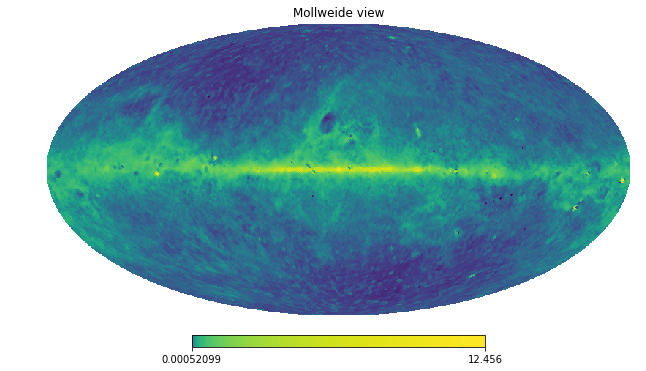

In [43]:
wmap_spd = hp.read_map(
    '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/wmap_mcmc_sd_k_spin_dust_temp_7yr_v4p1.fits',
    nest=True)
wmap_spd[wmap_spd==hp.UNSEEN] = np.nan

hp.mollview(wmap_spd, 
            nest=True,
           norm ='log')

In [44]:
wmap_planck_spdust = hp.ud_grade(planck_mw['AME'],
                                 nside_out=64,
                                 order_in = 'NESTED',
                                 order_out = 'NESTED') / wmap_spd

#sb.joinplot()

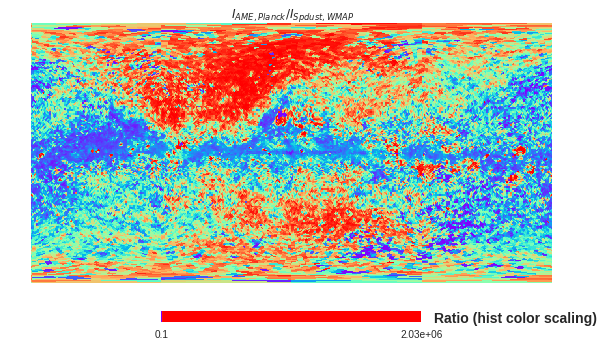

In [234]:
hp.cartview(wmap_planck_spdust, 
            norm='hist',
            min=0.1,
            nest=True,
            title = " $I_{AME, Planck} / I_{Spdust, WMAP}$",
            unit="Ratio (hist color scaling)",
            cmap =cmap)

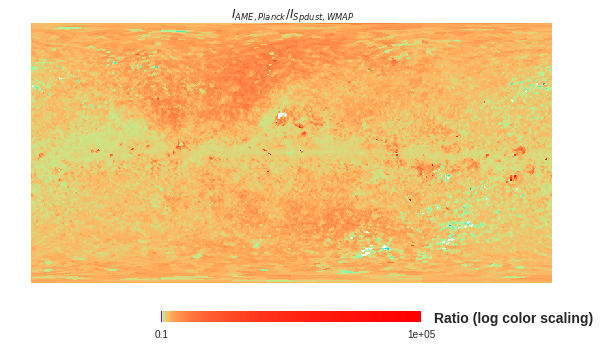

In [243]:
hp.cartview(wmap_planck_spdust, 
            norm='log',
            min=0.1,
            max = 1e5,
            nest=True,
            title = " $I_{AME, Planck} / I_{Spdust, WMAP}$",
            unit="Ratio (log color scaling)",
            cmap =cmap)

In [245]:
planck_spd_n64 = hp.ud_grade(planck_mw['AME'],
                                 nside_out=64,
                                 order_in = 'NESTED',
                                 order_out = 'NESTED')


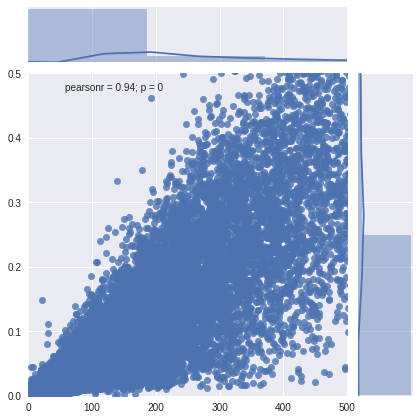

In [230]:
import seaborn as sb


sb.jointplot(   
            planck_spd_n64,
            wmap_spd,
            kind = 'reg',
            dropna =True,
            xlim = (0,500),
            ylim = (0,0.5)
            )

In [ ]:
sb.jointplot(   
            A9_n64[(A9_n64!=hp.UNSEEN) & (wmap_spd!=hp.UNSEEN)],
            wmap_spd[(A9_n64!=hp.UNSEEN) & (wmap_spd!=hp.UNSEEN)],
            kind = 'reg',
            dropna =True,
            xlim = (-1,10),
            ylim = (-0.1,2)
            )

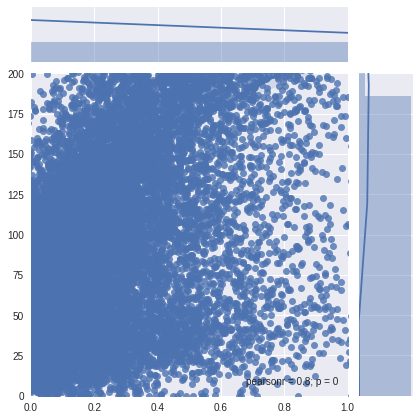

In [250]:
sb.jointplot(   
            A9_n64[(A9_n64!=hp.UNSEEN) & (planck_spd_n64!=hp.UNSEEN)],
            planck_spd_n64[(A9_n64!=hp.UNSEEN) & (planck_spd_n64!=hp.UNSEEN)],
            kind = 'reg',
            dropna =True,
            xlim = (0,1),
            ylim = (-0.1,200)
            )

In [269]:
import aplpy
   

def fits_display(image_file):
    
 
    # Create a new figure
    fig = aplpy.FITSFigure(image_file)

    # Show the colorscale
    #fig.show_colorscale()

    # Make ticks white
#     fig.ticks.set_color('white')

#     # Make labels smaller
#     fig.tick_labels.set_font(size=15)
    
#     # Round out those tick labels:
#     fig.tick_labels.set_xformat('ddd.dd')
#     fig.tick_labels.set_yformat('ddd.dd')
    
#     # Overlay a grid
#     fig.add_grid()
#     fig.grid.set_alpha(0.5)
    
#     # Add a colorbar
#     fig.add_colorbar()
#     fig.colorbar.set_axis_label_text('Intensity (MJy/sr)')
    
    return fig


In [272]:
## This will make a single cutout:

from drizzlib.healpix2wcs import healpix2wcs

def make_fits_cutout(hdr_temp, hp_path, out_path):
    

    
    healpix2wcs( 
            hp_path, 
            #field=0, 
            header=hdr_temp, 
            header_hdu=None, 
            output=out_path, 
            use_bilinear_interpolation=False, 
            ignore_blank=True, 
            blank_value=hp.UNSEEN, 
            clobber=True)
    
    aplpy.FITSFigure(out_path)
    
    
    
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_halpha.fits'

hp_path = '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/lambda_halpha_fwhm06_0512.fits'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)


Using Python 2.7.12 |Anaconda 2.4.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ignoring BLANK HEALPixels of value -1637499999999999923489519697920.
3145728 HEALPixels in the whole map.
Coordinates frame is '<Galactic Frame>'.
14438 HEALPixels in the WCS wrapper polygon.




AttributeError: 'XAxis' object has no attribute 'get_axes'

AttributeError: 'XAxis' object has no attribute 'get_axes'